In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data into dataframe from csv file
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.info()

# NO Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

In [7]:
# Check the unique values in the category columns

cat_columns = ['season','mnth', 'weekday', 'weathersit']
for col in cat_columns:
    print(bikes[col].value_counts(), end=' ')

3    188
2    184
1    180
4    178
Name: season, dtype: int64 12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64 1    463
2    246
3     21
Name: weathersit, dtype: int64 

In [8]:
# convert categotical coulmn values into categorical string values

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
bikes['mnth'] = bikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [10]:
bikes['weekday'] = bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [11]:
bikes['weathersit'] = bikes['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'Thunderstorm'})

In [12]:
print(bikes.shape)
bikes.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600



### EDA

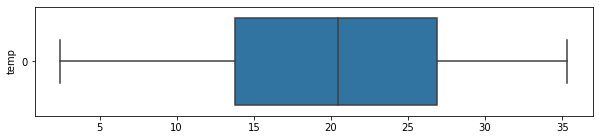

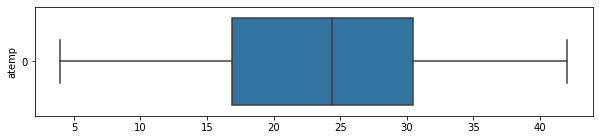

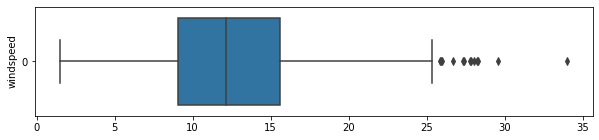

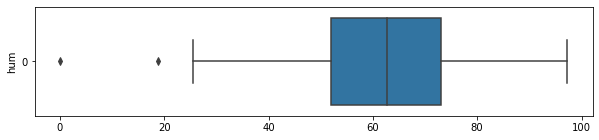

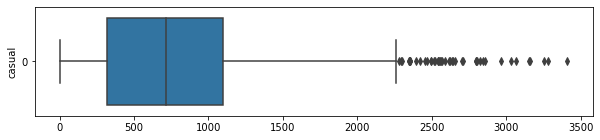

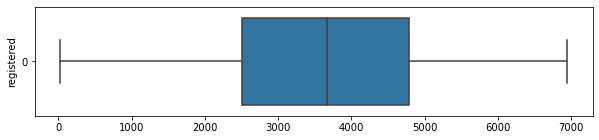

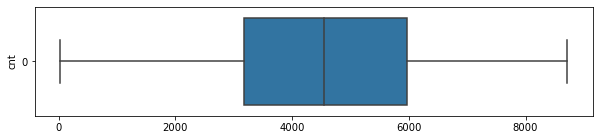

In [13]:
# Univariate Analysis - Analyse all numerical features using boxplot 

num_col = ['temp', 'atemp', 'windspeed', 'hum', 'casual', 'registered', 'cnt']

for col in num_col:
    plt.figure(figsize=(10,2))
    sns.boxplot(data = bikes[col], orient='h')
    plt.ylabel(col)
    plt.show()

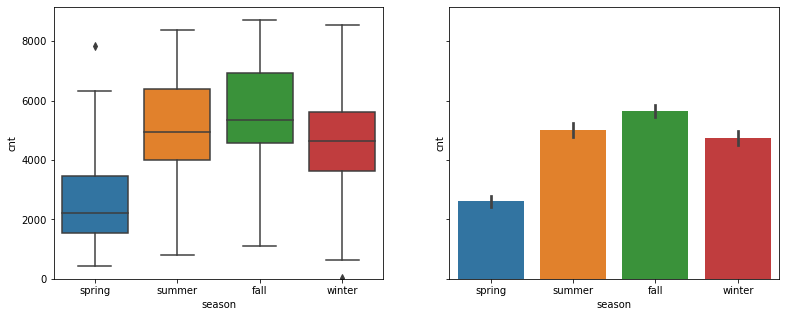

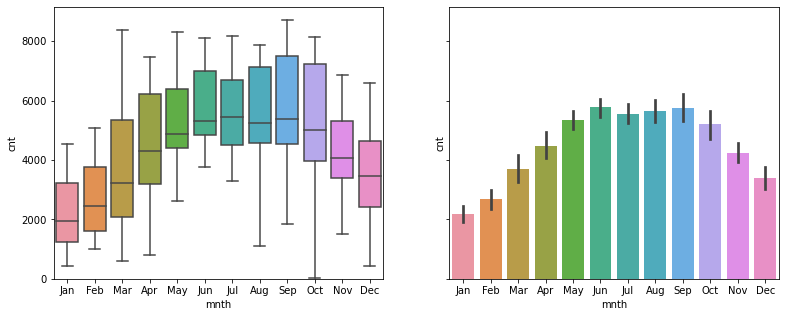

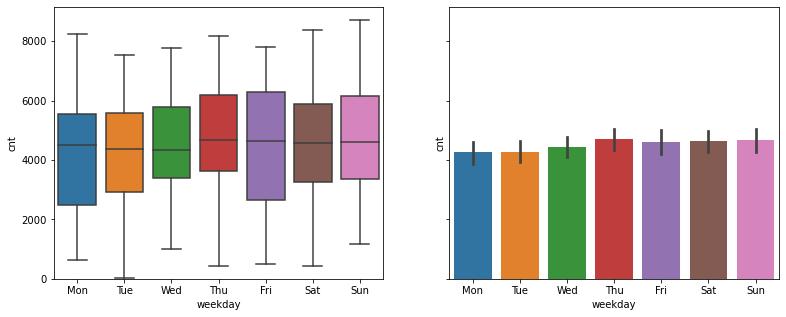

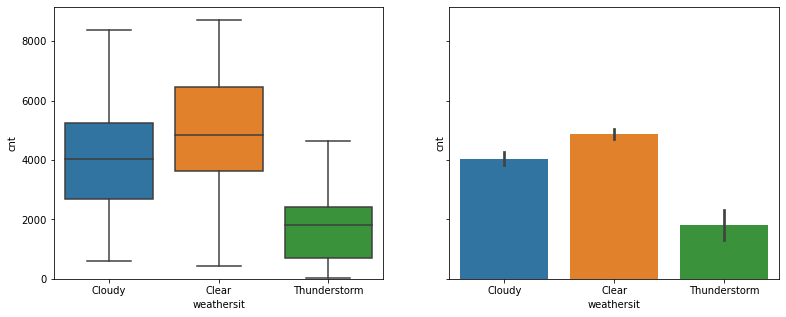

In [14]:
# Bi-variate Analysis - Analyse all categorical features using boxplot and barplot

for col in cat_columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)
    plt.gcf().set_size_inches(13,5)
    sns.boxplot(x=bikes[col], y=bikes['cnt'], ax=ax1)
    sns.barplot(x=bikes[col], y=bikes['cnt'], ax=ax2)
    plt.show()

### Bi-variate Analysis - Analyse all numerical features using scatter plots

- temp, atemp features have high correlation
    - Drop atemp
- casual, registered, cnt are realted features
    - Drop casual, registered

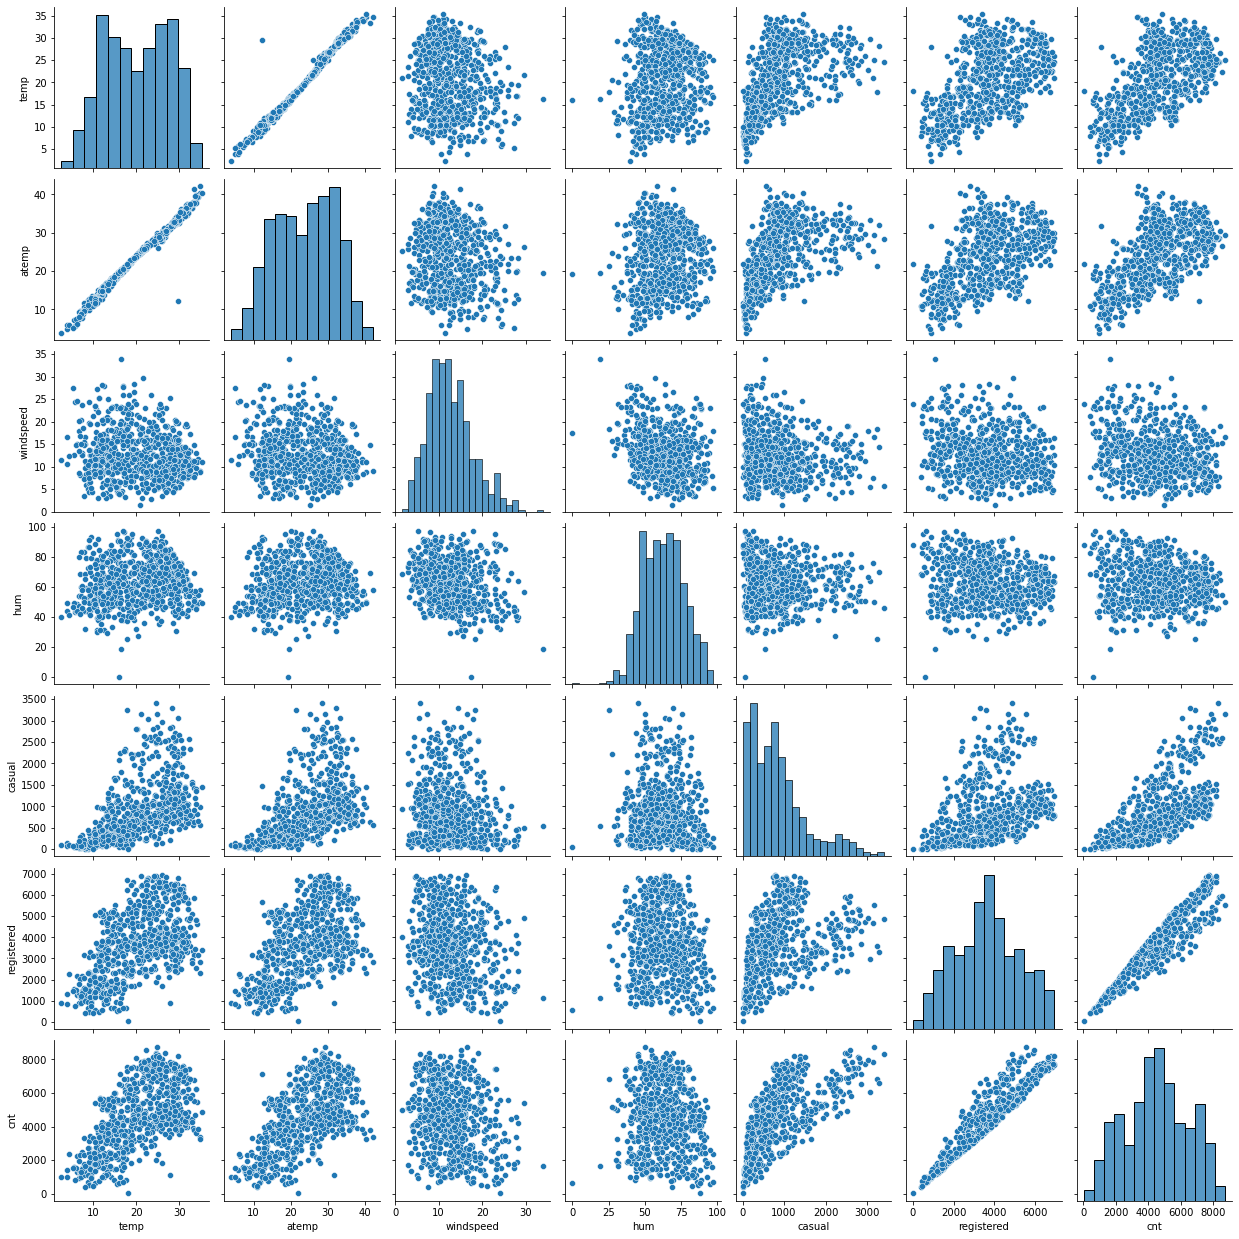

In [15]:
sns.pairplot(bikes[num_col])
plt.show()

<AxesSubplot:>

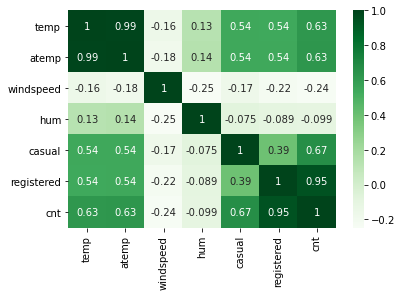

In [16]:
sns.heatmap(bikes[num_col].corr(), cmap='Greens', annot=True)

In [17]:
bikes.drop(columns=['atemp','casual', 'registered'], inplace=True)

In [18]:
# Create dummy variables for the categorical features

dummy_var = pd.get_dummies(bikes[cat_columns], drop_first=True)
dummy_var.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
bikes = pd.concat([bikes, dummy_var], axis=1)

In [20]:
bikes.drop(columns=cat_columns, inplace=True)

In [21]:
bikes.drop(columns=['instant', 'dteday'], axis=1, inplace=True)

In [22]:
bikes.shape

(730, 29)

In [23]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Building

In [24]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [25]:
# Assign X, y

y = bikes.pop('cnt')
X = bikes

In [26]:
# Split train, test data

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7, random_state=100)

In [27]:
# Scale data

scaler = StandardScaler()
scaled_col = ['temp','hum','windspeed']
X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])


#### Build linear regression model by
- First using RFE
- then eliminating features manually by analysing p values and VIF.

In [28]:
# Apply RFE 

lreg = LinearRegression()
lreg.fit(X_train, y_train)

rfe = RFE(lreg,21)
rfe = rfe.fit(X_train, y_train)
rfe_col = X_train.columns[rfe.support_]

rfe_df = pd.DataFrame()
rfe_df['column'] = X_train.columns
rfe_df['selected'] = rfe.support_
rfe_df['rank'] = rfe.ranking_
rfe_df.sort_values('rank')

,column,selected,rank
0,yr,True,1
24,weekday_Tue,True,1
22,weekday_Sun,True,1
21,weekday_Sat,True,1
20,weekday_Mon,True,1
19,mnth_Sep,True,1
17,mnth_Nov,True,1
26,weathersit_Cloudy,True,1
12,mnth_Jan,True,1
11,mnth_Feb,True,1


In [29]:
# Create the model

X_train_rfe = X_train[rfe_col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     130.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.48e-185
Time:                        22:11:13   Log-Likelihood:                -4104.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     488   BIC:                             8346.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [30]:
# Check VIF for Multicollinearity

vif = pd.DataFrame()
vif['column'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif.sort_values('VIF', ascending=False)

,column,VIF
2,workingday,11.173887
6,season_spring,7.303140
8,season_winter,5.008767
3,temp,4.634855
7,season_summer,3.631452
17,weekday_Sun,2.854315
16,weekday_Sat,2.758965
11,mnth_Jan,2.587384
19,weathersit_Cloudy,2.407874
0,yr,2.097583


In [31]:
drop_col = []

In [32]:
# workingday has higher p value and VIF, drop the feature and re-evaluate the model

drop_col.append('workingday')
X_train_rfe.drop('workingday', axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.82e-186
Time:                        22:11:13   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     489   BIC:                             8340.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [33]:
vif = pd.DataFrame()
vif['column'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif.sort_values('VIF', ascending=False)

,column,VIF
5,season_spring,4.159184
2,temp,3.040171
7,season_winter,2.895146
10,mnth_Jan,2.457196
18,weathersit_Cloudy,2.203209
0,yr,2.037258
9,mnth_Feb,1.945686
12,mnth_Nov,1.887182
3,hum,1.821364
8,mnth_Dec,1.688730


In [34]:
# weekday_Sat has higher p vale, drop the feature and re-evaluate the model

drop_col.append('weekday_Sat')
X_train_rfe.drop('weekday_Sat', axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.41e-187
Time:                        22:11:13   Log-Likelihood:                -4104.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     490   BIC:                             8334.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [35]:
vif = pd.DataFrame()
vif['column'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif.sort_values('VIF', ascending=False)

,column,VIF
5,season_spring,4.012795
2,temp,2.965637
7,season_winter,2.828767
10,mnth_Jan,2.454467
17,weathersit_Cloudy,2.173961
0,yr,2.037107
9,mnth_Feb,1.945486
12,mnth_Nov,1.881642
3,hum,1.806697
8,mnth_Dec,1.683388


In [36]:
# weekday_Sun has higher p vale, drop the feature and re-evaluate the model

drop_col.append('weekday_Sun')
X_train_rfe.drop('weekday_Sun', axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.77e-188
Time:                        22:11:13   Log-Likelihood:                -4105.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [37]:
vif = pd.DataFrame()
vif['column'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif.sort_values('VIF', ascending=False)

,column,VIF
5,season_spring,3.957867
2,temp,2.939588
7,season_winter,2.784112
10,mnth_Jan,2.453012
16,weathersit_Cloudy,2.138189
0,yr,2.034109
9,mnth_Feb,1.944690
12,mnth_Nov,1.881361
3,hum,1.793298
8,mnth_Dec,1.674856


#### The final model (below) is concluded with 17 features 
- P value for all selected features is less than 0.05 
- VIF is less than 4 for all final features in the model
- R-Square value is 0.848

In [38]:
# mnth_Feb has higher p value, drop the feature and re-evaluate the model

drop_col.append('mnth_Feb')
X_train_rfe.drop('mnth_Feb', axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.21e-188
Time:                        22:11:13   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [39]:
vif = pd.DataFrame()
vif['column'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif.sort_values('VIF', ascending=False)

,column,VIF
5,season_spring,2.844272
2,temp,2.822465
7,season_winter,2.771415
15,weathersit_Cloudy,2.135085
0,yr,2.026902
11,mnth_Nov,1.852805
3,hum,1.793038
9,mnth_Jan,1.781528
8,mnth_Dec,1.548443
6,season_summer,1.502160


#### Model assumption analysis

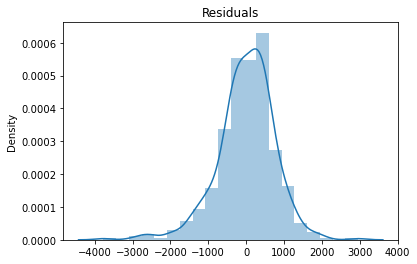

In [40]:
# Analyse the error distribution (should follow normal distribution with zero mean)

y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res, bins=20)
plt.title('Residuals')
plt.show()

In [41]:
# Verify the assumption - Erros should be independent of each other (No correlation with input variables)

round(pd.concat([res,X_train_rfe], axis=1).corr().loc[0],2)

0                          1.0
yr                         0.0
holiday                    0.0
temp                       0.0
hum                       -0.0
windspeed                 -0.0
season_spring             -0.0
season_summer              0.0
season_winter             -0.0
mnth_Dec                  -0.0
mnth_Jan                  -0.0
mnth_Jul                   0.0
mnth_Nov                  -0.0
mnth_Sep                   0.0
weekday_Mon               -0.0
weekday_Tue               -0.0
weathersit_Cloudy         -0.0
weathersit_Thunderstorm   -0.0
Name: 0, dtype: float64

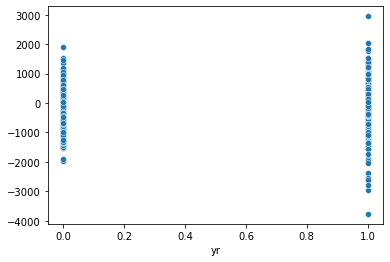

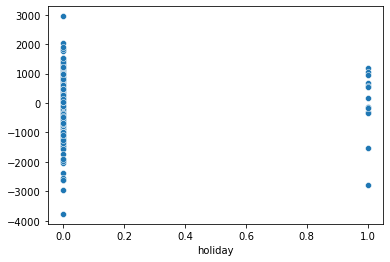

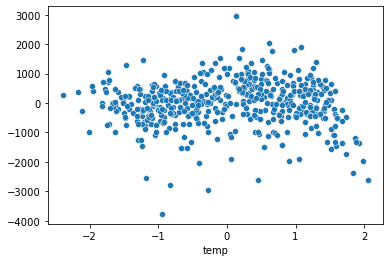

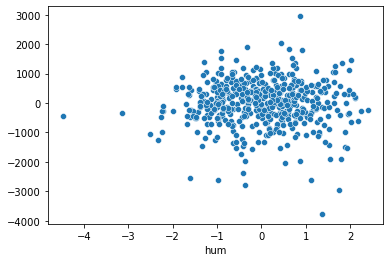

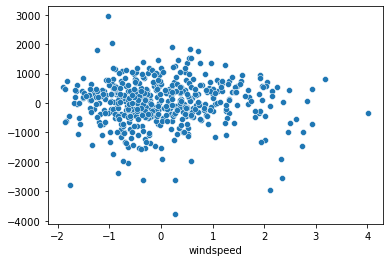

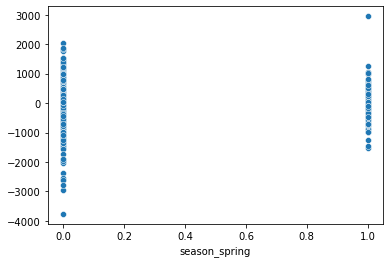

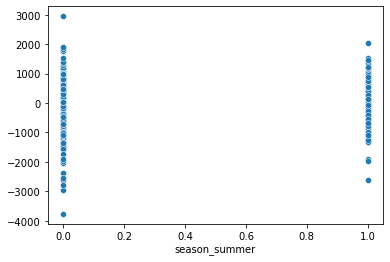

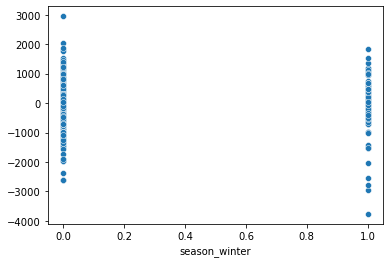

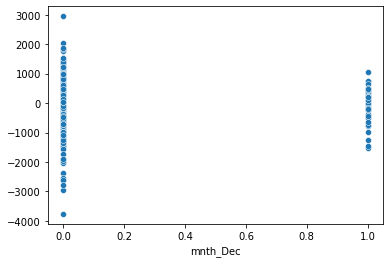

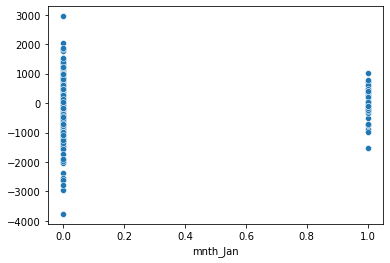

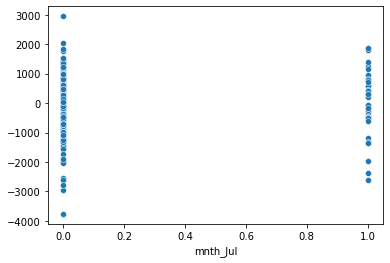

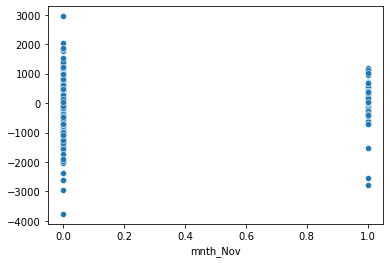

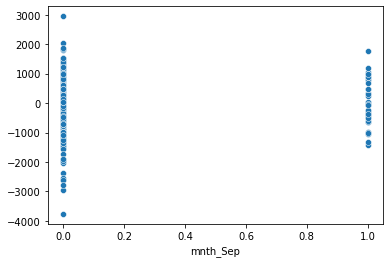

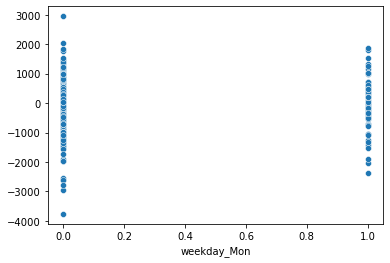

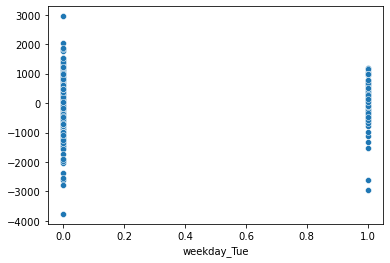

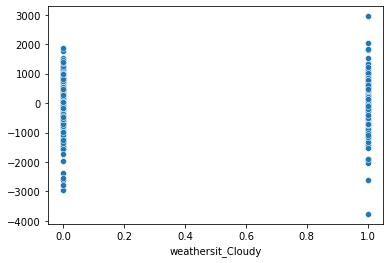

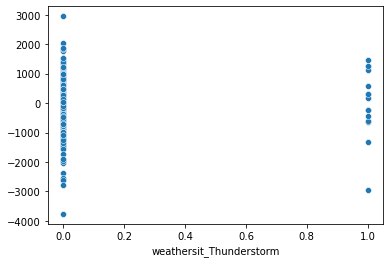

In [42]:
# Verify the assumption - Erros should be independent of each other (No clear pattern with input variables)

for col in X_train_rfe.columns:
    sns.scatterplot(X_train_rfe[col], res)
    plt.show()

### Predictions

In [43]:
# Scale test data - Transform

X_test[scaled_col] = scaler.transform(X_test[scaled_col])

In [44]:
# Predict demand for test data

X_test_rfe = X_test[rfe_col]
X_test_rfe.drop(columns=drop_col,inplace=True)
X_test_sm = sm.add_constant(X_test_rfe)
y_test_pred = lr.predict(X_test_sm)

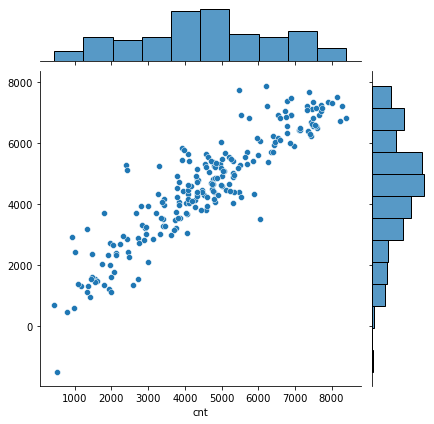

In [45]:
sns.jointplot(y_test,y_test_pred)
plt.show()

### 1. Calculate the R-squared score on the test set

In [46]:
r2_score(y_test,y_test_pred)

0.8259605926429405

### 2. Which variables are significant in predicting the demand for shared bikes?

The significance of the predictors (in-dependent variable) could be defined by their P values. Below are most significant  variables predicting the bikes demand (with zero P value).
- yr
- holiday
- temp
- hum
- windspeed
- season_winter
- mnth_Sep
- weathersit_Cloudy
- weathersit_Thunderstorm

### 3. How well those variables describe the bike demands

They were able to describe 85% of variance for the bike demands. (R2_Score)